# Lección 6: Pipeline de Aprendizaje Automático

Autor: Jorge Castro, Fabricio Quirós Corella

En el área de aprendizaje automático existe una enorme variedad respecto a las **características y naturaleza de los datos** con los que se trabaja (estructurados y no estructurados, con o sin valores faltantes, con o sin desbalance de clases, etc), así como de las **tareas a realizar** sobre los mismos (regresión, clasificación, clustering, reducción de dimensionalidad, etc), los diferentes **modelos** (árboles de decisión, máquinas de soporte vectorial, redes neuronales, etc) y **enfoques de aprendizaje** para resolver estas tareas (supervisado, no supervisado, semi-supervisado, por reforzamiento, etc) y las diferentes **métricas para evaluar o comparar el desempeño** de los modelos ($R^2$, RMSE, MAE, exactitud, etc). Por lo tanto, es realmente difícil pensar en un único pipeline o flujo de trabajo que aplique a cualquier proyecto dentro del área de aprendizaje automático. No obstante, en esta lección veremos algunos de los problemas más comunes y las técnicas o secuencias de pasos que normalmente se utilizan cuando se desea aplicar aprendizaje automático a un set de datos en el mundo real. En particular, la sesión de hoy estará enfocada en **datos estructurados** y **aprendizaje supervisado**.

![](https://drive.google.com/uc?export=view&id=11d0mX4oxKaHnolWgFHziblJ1PIyQVta0)

## Recolección de Datos

![](https://drive.google.com/uc?export=view&id=17lABZ3kXP4C2NHUBfh4nOsWeBOqxj-ff)

## Extracción de características

La extracción de características es un paso adicional que suele tomarse cuando trabajamos con **datos no estructurados**, como imágenes, audio o video. Este consiste en extraer las características más relevantes de los datos que permitan un mejor desempeño del modelo de aprendizaje automático. En el caso de las imágenes, es usual aplicar filtros para eliminar el ruido, hacer una segmentación para facilitar la detección de objetos de interés y posteriormente calcular métricas sobre la forma, tamaño, color o textura de los mismos.

![](https://drive.google.com/uc?export=view&id=1GMNI9gAsqsGWBAbsVV5ITY5Mny56vFJx)


## Análisis Exploratorio de Datos

El análisis exploratorio de los datos (EDA) permite resumir y entender las características principales de los datos a partir de estadísticas descriptivas y técnicas visuales. El EDA permite encontrar patrones, relaciones o anomalías para tomar mejores desiciones y más informadas a lo largo del flujo de trabajo. A continuación, veremos algunas técnicas de EDA aplicadas a un dataset en Python.  

### Descripción del set de datos

**Nombre**: Pima Indians Diabetes Database (tomado de https://www.kaggle.com/uciml/pima-indians-diabetes-database)

**Tarea a resolver**: Predicción sobre aparición de diabetes en pacientes a partir de medidas de diagnóstico

**Resumen**: Este conjunto de datos es originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes o no, basándose en determinadas medidas de diagnóstico incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad y de origen indio Pima.

![](https://drive.google.com/uc?export=view&id=1DQpAubZ30wBNlcBxGDIEGAUpyZZYnGS4)


**Información de las columnas**:
0. Number of times pregnant

1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test

2. Diastolic blood pressure (mm Hg)

3. Triceps skin fold thickness (mm)

4. 2-Hour serum insulin (mu U/ml)

5. Body mass index (weight in kg/(height in m)^2)

6. Diabetes pedigree function

7. Age (years)

8. Class variable (0 or 1)

(sobre kaggle: https://youtu.be/TNzDMOg_zsw)

### Estadísticas descriptivas

Habilitemos el set de datos en nuestro ambiente de trabajo.

In [1]:
#Subir el set de datos a Google Colab
from google.colab import files
uploaded = files.upload()

In [2]:
#Código para montar el Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Carguemos el archivo separado por comas.

In [17]:
#Lectura del set de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#filepath = '/content/drive/MyDrive/MachineLearning/datasets/diabetes.csv'
filepath = '/content/drive/MyDrive/datasets/diabetes - diabetes.csv'
dataset = pd.read_csv(filepath)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Pima Indians Diabetes Database  769 non-null    object
 1   Unnamed: 1                      769 non-null    object
 2   Unnamed: 2                      769 non-null    object
 3   Unnamed: 3                      769 non-null    object
 4   Unnamed: 4                      769 non-null    object
 5   Unnamed: 5                      769 non-null    object
 6   Unnamed: 6                      769 non-null    object
 7   Unnamed: 7                      769 non-null    object
 8   Unnamed: 8                      769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


**QUIZ LECTURA DE DATOS**

¿El set de datos fue leído correctamente?
- Sí
- No
- No se puede saber a partir de la información de `dataset.info()`

Realicemos una inspección rápida del archivo correspondiente al set de datos.

In [25]:
!head '/content/drive/MyDrive/datasets/diabetes - diabetes.csv'

Pima Indians Diabetes Database,,,,,,,,
Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0


Los índices de los dataframes en Pandas inician en cero, por lo que indicamos que el encabezado del set de datos se encuentra en la línea uno del archivo separado por comas.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/drive/MyDrive/datasets/diabetes - diabetes.csv', header=1)
dataset.info()

#Algunos parámetros importantes de pd.read_csv----------------------------------
#header: indica en qué línea comienza el encabezado (nombres de las columnas)
#skiprows: indica hasta que línea inicial se debe ignorar el contenido del csv.
#sep: caracter usado para separar los valores de cada columna por defecto es ','
#na_values: especificar el caracter a interpretar como valores faltantes
#nrows: cuantas filas se desean leer del csv
#Documentación oficial: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#-------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
dataset.head() #Primeras 5 filas

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [23]:
dataset.tail() #Ultimas 5 filas

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [24]:
dataset.head(n=50) #Primeras 50 filas

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   
20            3      126             88             41      235  39.3   
21            8       99             84              0        0  35.4   
22            7      196             90              0        0  39.8   
23            9      119             80             35        0  29.0   
24           11      143             94             33      146  36.6   
25           10      125             70             26      115  31.1   
26            7      147             76              0        0  39.4   
27            1       97             66             15      140  23.2   
28           13      145             82             19      110  22.2   
29            5      117             92              0        0  34.1   
30            5      109             75             26        0  36.0   
31            3      158             76             36      245  31.6   
32            3       88             58             11       54  24.8   
33            6       92             92              0        0  19.9   
34           10      122             78             31        0  27.6   
35            4      103             60             33      192  24.0   
36           11      138             76              0        0  33.2   
37            9      102             76             37        0  32.9   
38            2       90             68             42        0  38.2   
39            4      111             72             47      207  37.1   
40            3      180             64             25       70  34.0   
41            7      133             84              0        0  40.2   
42            7      106             92             18        0  22.7   
43            9      171            110             24      240  45.4   
44            7      159             64              0        0  27.4   
45            0      180             66             39        0  42.0   
46            1      146             56              0        0  29.7   
47            2       71             70             27        0  28.0   
48            7      103             66             32        0  39.1   
49            7      105              0              0        0   0.0   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5         

In [26]:
dataset.describe() # Estadística descriptiva de cada columna

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

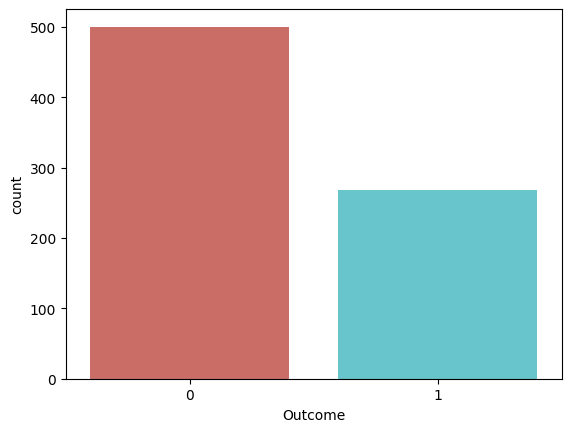

0    500
1    268
Name: Outcome, dtype: int64

In [27]:
#Observar si las clases están o no desbalanceadas
import seaborn as sns

sns.countplot(x=dataset.Outcome, orient='v', palette='hls')
plt.show()

dataset['Outcome'].value_counts()

Se observa que en el set de datos hay casi el doble de personas no diabéticas (500) respecto a las diabéticas (268), por lo cual se puede decir que hay un **desbalance considerable de clases**.

### Pairplots

Los *pairplots* nos permiten observar la relación entre cada par de predictores y la distribución individual (histogramas en la diagonal) de  cada variable. Esto nos permite inspeccionar visualmente si dos variables **tienen o no correlación** y si esta es **positiva** o **negativa**. Además, los histogramas de la diagonal nos permiten observar si hay **inclinación** importante en las distribuciones o presencia de **valores extremos** (*outliers*). Por último, podemos graficar en color las categorías a predecir para tener una mejor idea de cuáles variables individuales (histogramas) y cuáles pares de variables (gráficos de dispersión) logran una **mejor separación de las clases**.

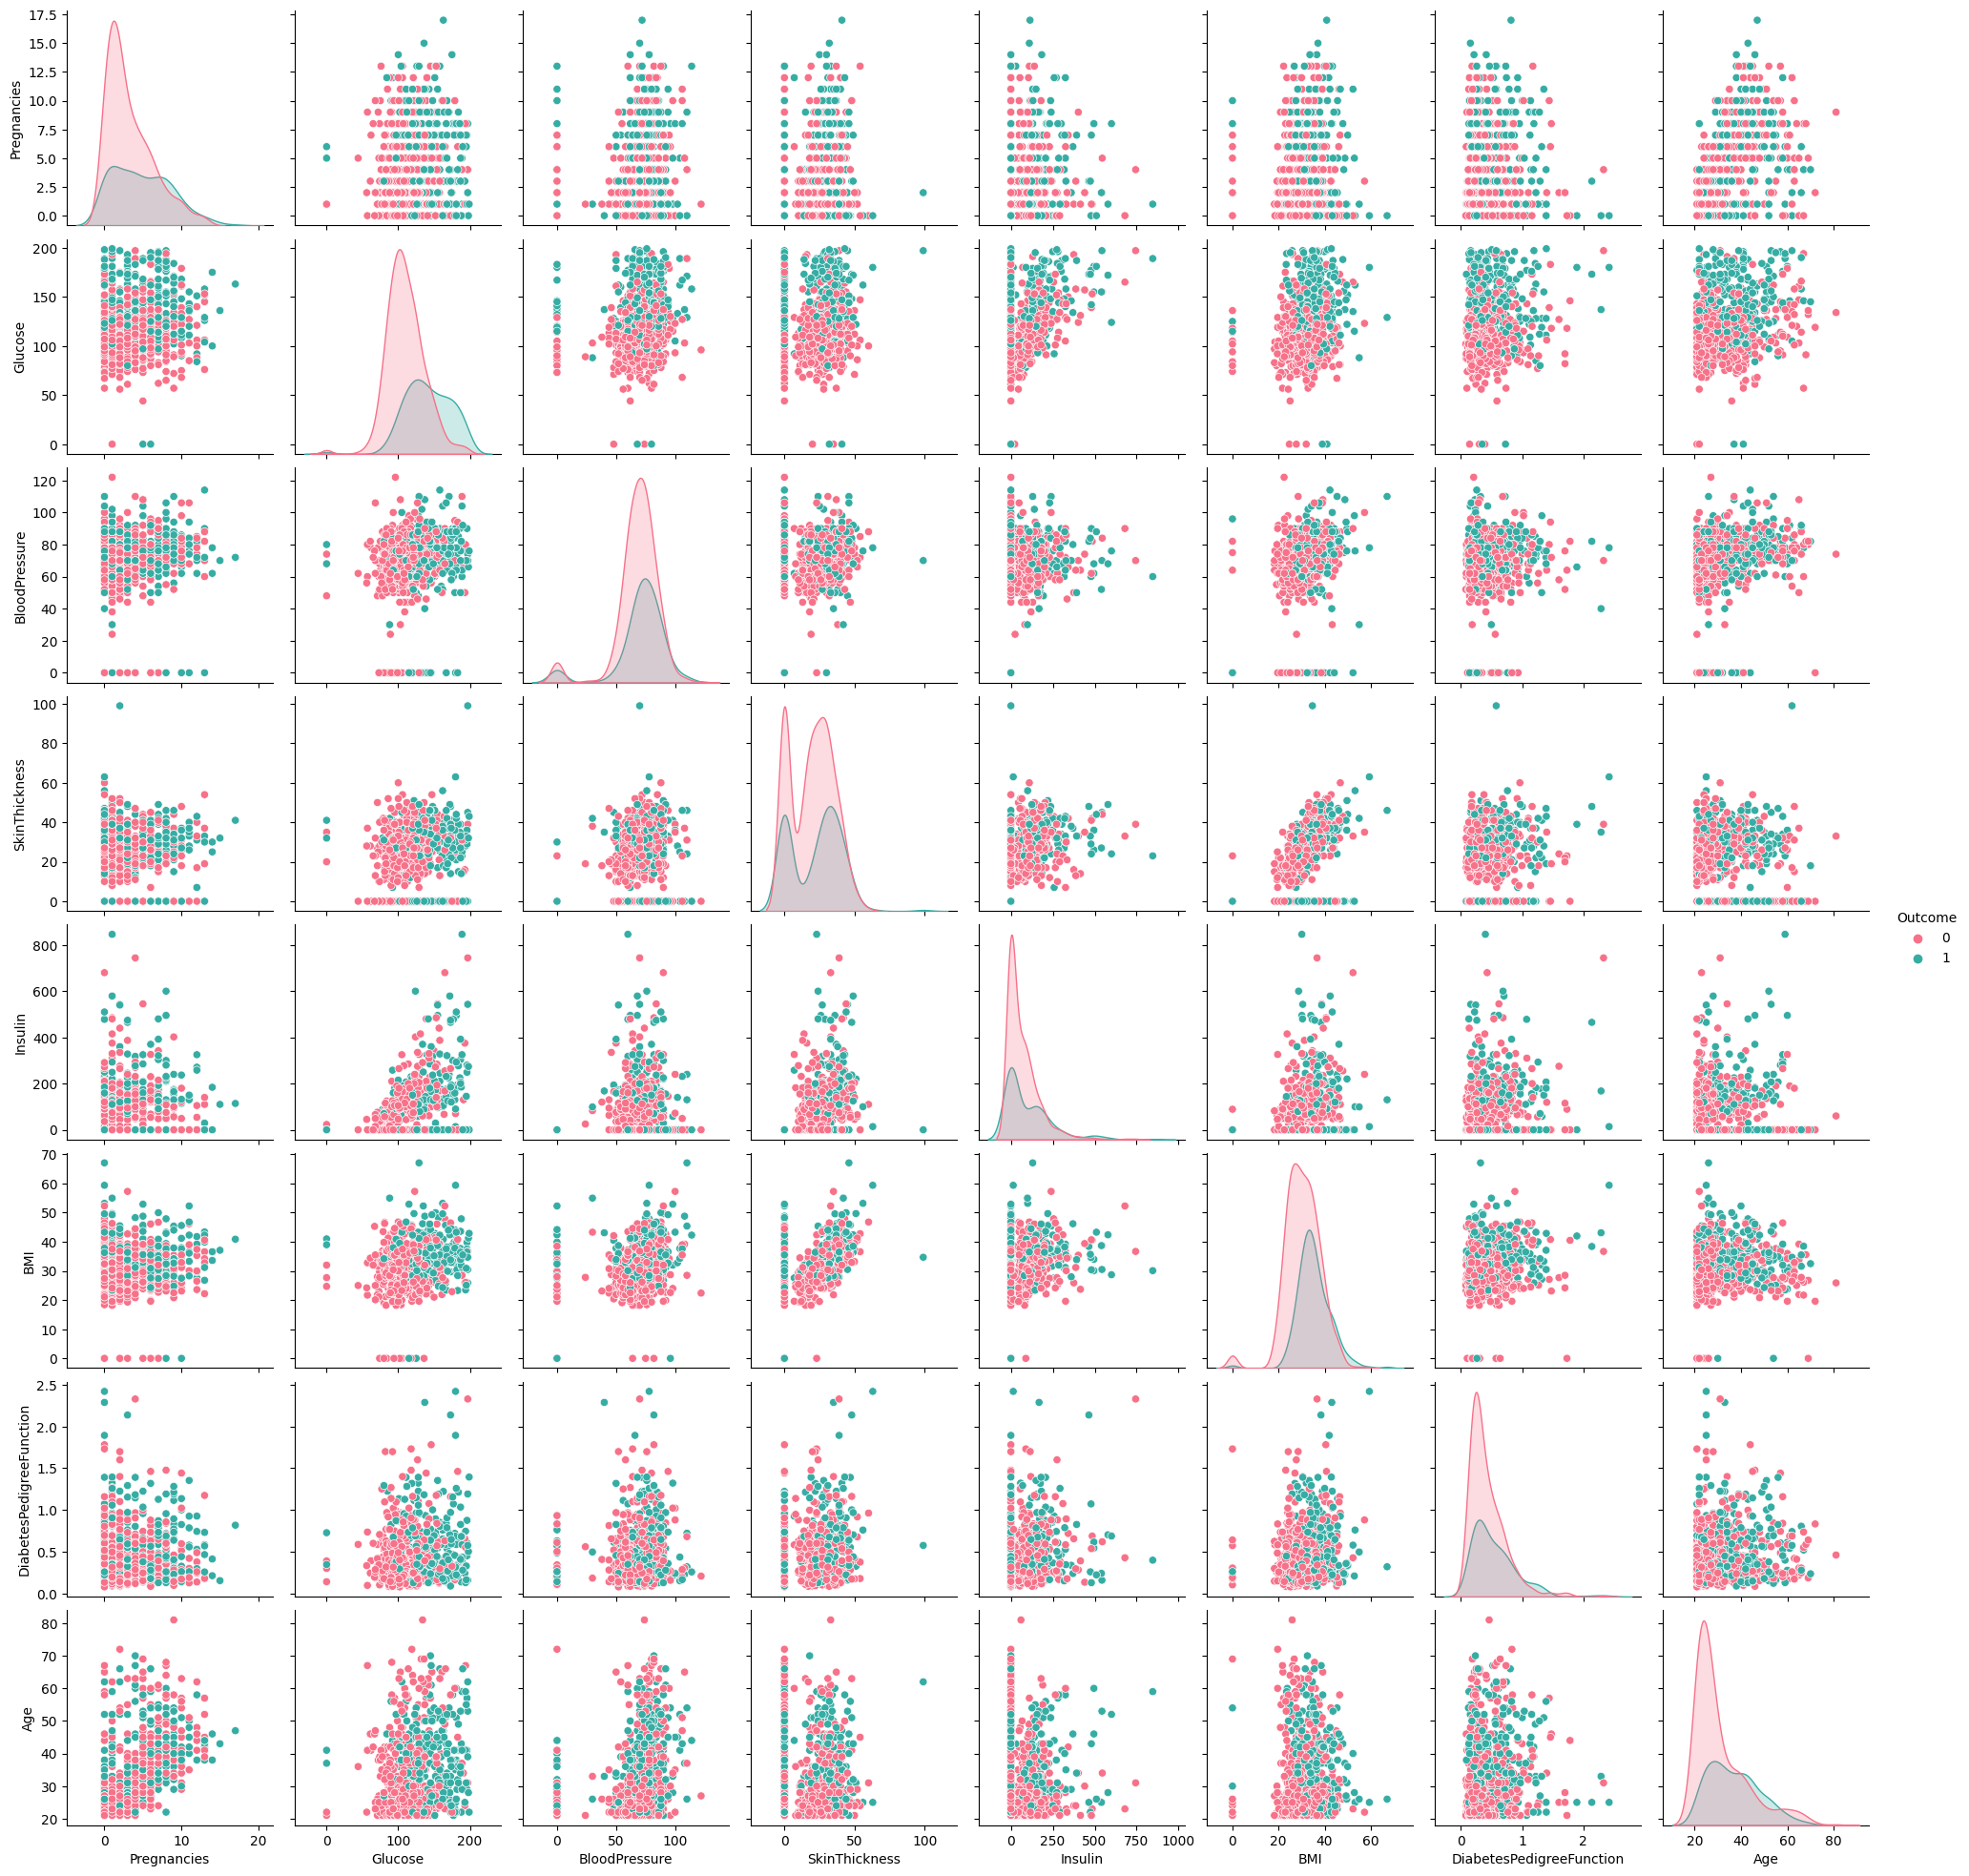

In [28]:
#imprimir en pantalla un pairplot

import seaborn as sns

pp = sns.pairplot(dataset, hue="Outcome", palette="husl")

Al observar los gráficos de dispersión, podemos afirmar que no hay una pareja de predictores capaces de claramente separar las dos clases.

## Ingeniería de características

Consiste en la manipulación o tratamiento del set de datos, con el propósito de obtener una representación alternativa del mismo, para así facilitar o mejorar su posterior análisis en una etapa de aprendizaje automático.

Implica identificar las partes incorrectas, irrelevantes, duplicadas, incompletas y/o faltantes de un conjunto de datos, para luego reemplazar o limpiar esas partes sucias de los datos.

### Tratamiento de valores inválidos

Si volvemos a ejecutar la función `.info()`, podemos ver que no se detectan valores nulos en ninguna columna del set de datos:



In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Sin embargo, si prestamos mayor atención al significado de las columnas de la 1era a la 5ta  del set de datos, notamos que los valores faltantes son representados como ceros.

In [30]:
dataset.head(n=20) # Desplegar las primeras 20 muestras

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

Por ejemplo, no tiene sentido que una persona tenga cero insulina o una presión arterial de cero. Si reemplazamos los ceros en las columnas de la 1 a la 5 por *NANs* (tipo de dato usado en numpy para representar los valores faltantes), podemos posteriormente contarlos y saber cuantos valores faltantes hay en cada columna:

In [31]:
tempDataset = dataset.copy()
#Reemplazo de ceros por NaNs en las columnas de la 1 a la 5
tempDataset.iloc[:,1:6] = tempDataset.iloc[:,1:6].replace(0,np.NaN)
#Conteo de NaNs en las columnas de la 1 a la 5
tempDataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Existen múltiples estrategias para lidiar con los valores faltantes o inválidos de un set de datos. La estrategia más simple consiste en eliminar todas las filas que contengan valores faltantes. En este caso, como la proporción de valores faltantes es muy elevada, no resulta una buena idea y conviene más hacer un reemplazo de estos valores faltantes.

La media o la mediana son posibles valores con los que podemos hacer el reemplazo. Si observamos nuevamente el pairplot que obtuvimos anteriormente, notamos que la mayoría de histogramas presentan una inclinación significativa y valores extremos, por lo que la mediana resulta una medida más robusta para aproximar el valor medio. Además, es importante hacer el reemplazo tomando en cuenta las diferencias en las distribuciones de las personas diabéticas y no diabéticas.

In [32]:
#Reemplazo de los valores faltantes de acuerdo a la mediana de su columna
#para la clase a la que pertenece la observación (diabéticos o no diabéticos)

temp = tempDataset.groupby('Outcome') #Agrupar por diabéticos y no diabéticos
dataset2 = temp.transform(lambda x: x.fillna(x.median())) #Relleno de datos con la mediana
tempDataset[tempDataset.isna().any(axis=1)].head() #Imprimir primeras filas con valores faltantes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
5            5    116.0           74.0            NaN      NaN  25.6   
7           10    115.0            NaN            NaN      NaN  35.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
5                     0.201   30        0  
7                     0.134   29        0

In [33]:
temp.median() #imprimir medianas de cada columna según su clase

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Outcome                                                                      
0                2.0    107.0           70.0           27.0    102.5  30.1   
1                4.0    140.0           74.5           32.0    169.5  34.3   

         DiabetesPedigreeFunction   Age  
Outcome                                  
0                           0.336  27.0  
1                           0.449  36.0

In [34]:
dataset2[tempDataset.isna().any(axis=1)].head() #imprimir valores rellenados

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
5            5    116.0           74.0           27.0    102.5  25.6   
7           10    115.0           70.0           27.0    102.5  35.3   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
5                     0.201   30  
7                     0.134   29

In [35]:
dataset2['Outcome'] = tempDataset['Outcome'] #Agregamos la columna Outcome nuevamente al set
dataset2.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Escalado de datos

Podemos observar que las escalas de los predictores son muy variables, lo cual perjudica el desempeño de algunos modelos de aprendizaje automático y hace más lenta la convergencia de algunos de los algoritmos de optimización que usan estos modelos.

In [36]:
dataset2.describe() #observar rangos de las variables (min y max)

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.677083      72.389323      29.089844  141.753906   
std       3.369578   30.464161      12.106039       8.890820   89.100847   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  102.500000   
75%       6.000000  140.250000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.434635                  0.471876   33.240885    0.348958  
std      6.880498                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

La forma más común de escalar los datos es restandoles su media y dividiendo entre su desviación estándar:

$\hat{x}=\frac{x-\mu_x}{\sigma_x}$

A este proceso se le llama **estandarización** y permite que los datos se asemejen más a una distribución normal con media cero y desviación estándar uno, lo cual es requisito para el funcionamiento adecuado de algunos modelos de aprendizaje automático.


In [37]:
from sklearn.preprocessing import StandardScaler #Estandarización
dataset3 = dataset2.copy()
dataset3.iloc[:,:-1] = pd.DataFrame(StandardScaler().fit_transform(dataset2.iloc[:,:-1]), columns=dataset2.columns[:-1]) #Estandarización

Observemos el efecto de estandarizar los datos mediante el despliegue de información estadística del nuevo set de datos y de su pairplot.

In [38]:
dataset3.describe()

Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17  1.480297e-16  -3.978299e-16   8.095376e-18 -3.469447e-18   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -2.551447e+00  -3.999727e+00  -2.486187e+00 -1.434747e+00   
25%   -8.448851e-01 -7.202356e-01  -6.934382e-01  -4.603073e-01 -4.408430e-01   
50%   -2.509521e-01 -1.536274e-01  -3.218035e-02  -1.226607e-01 -4.408430e-01   
75%    6.399473e-01  6.100618e-01   6.290775e-01   3.275348e-01  3.116039e-01   
max    3.906578e+00  2.539814e+00   4.100681e+00   7.868309e+00  7.909072e+00   

                BMI  DiabetesPedigreeFunction           Age     Outcome  
count  7.680000e+02              7.680000e+02  7.680000e+02  768.000000  
mean   1.318390e-16              2.451743e-16  1.931325e-16    0.348958  
std    1.000652e+00              1.000652e+00  1.000652e+00    0.476951  
min   -2.070186e+00             -1.189553e+00 -1.041549e+00    0.000000  
25%   -7.176590e-01             -6.889685e-01 -7.862862e-01    0.000000  
50%   -5.593870e-02             -3.001282e-01 -3.608474e-01    0.000000  
75%    6.057816e-01              4.662269e-01  6.602056e-01    1.000000  
max    5.041489e+00              5.883565e+00  4.063716e+00    1.000000

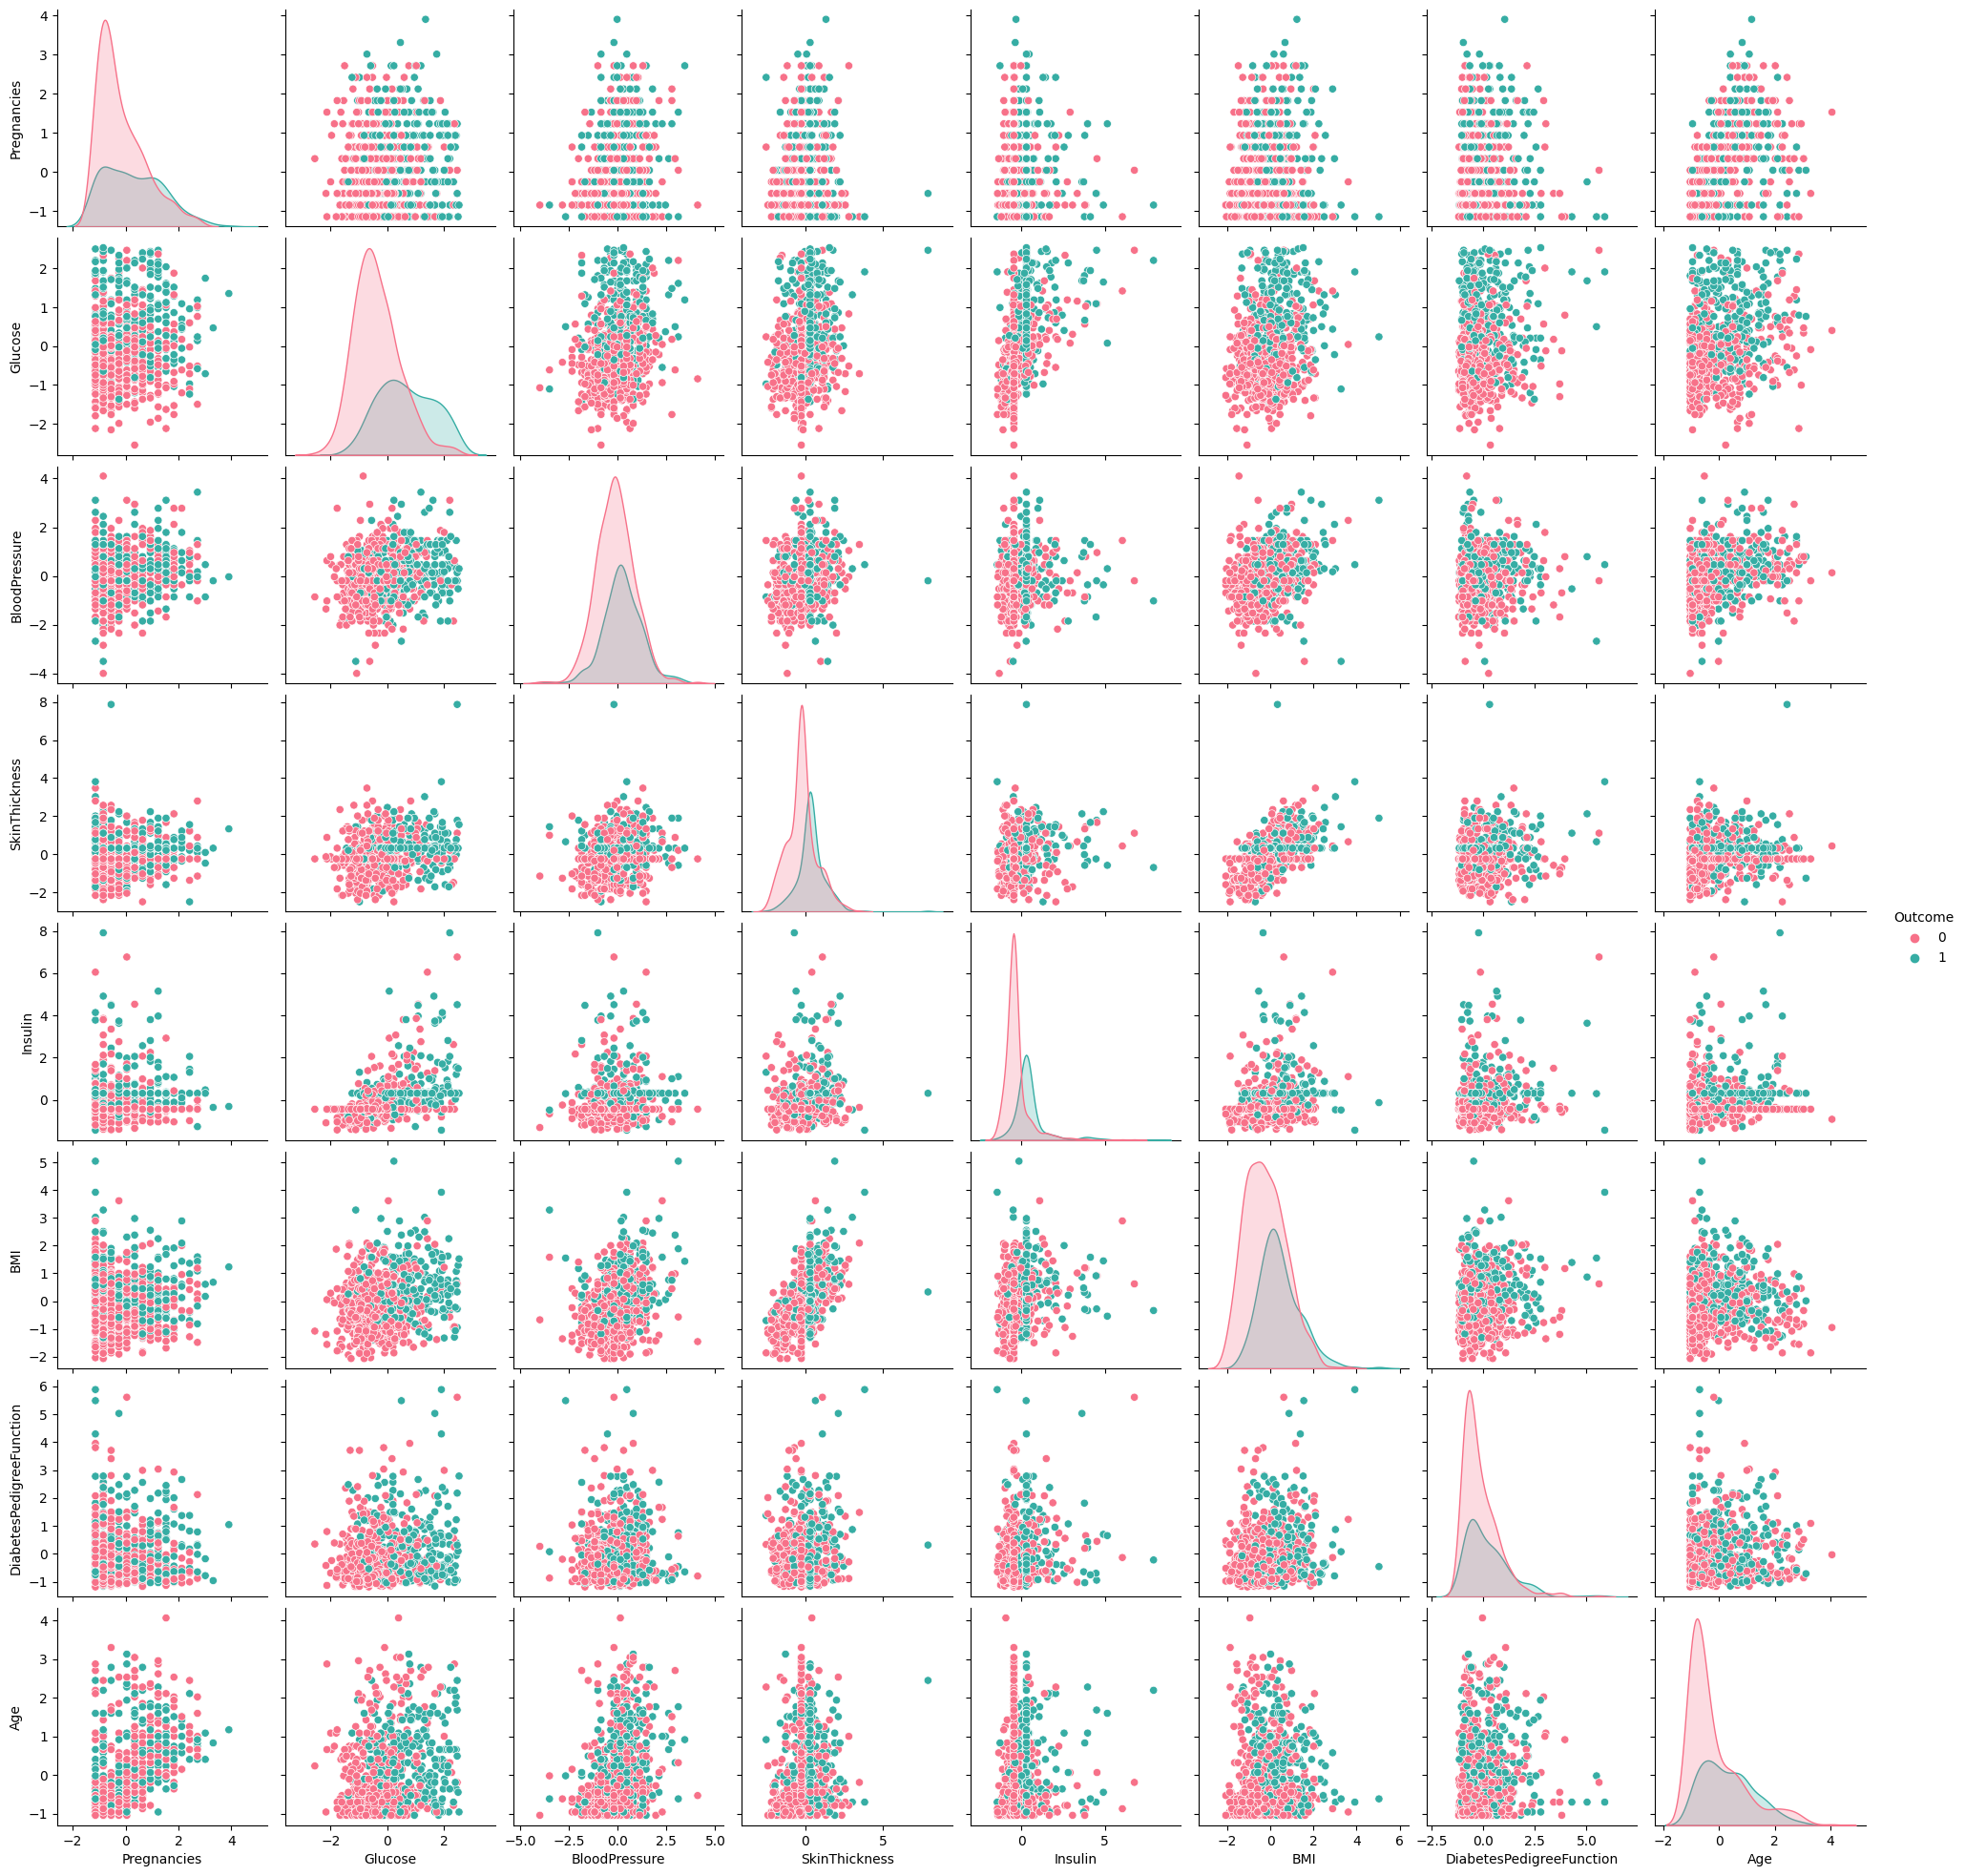

In [39]:
#imprimir en pantalla un pairplot
pp = sns.pairplot(dataset3, hue="Outcome", palette="husl")

También podemos escalar de 0 a 1 el rango de valores de cada predictor al restarle el mínimo de la columna a cada valor y dividirlo entre la diferencia entre su valor máximo y mínimo. Está técnica se conoce como **normalización min-max**:

 $\hat{x}=\frac{x-\min(x)}{\max(x)-\min(x)}$

In [40]:
from sklearn.preprocessing import MinMaxScaler #Normalización min-max
dataset4 = dataset2.copy()
dataset4.iloc[:,:-1] = pd.DataFrame(MinMaxScaler().fit_transform(dataset2.iloc[:,:-1]),
                                    columns=dataset2.columns[:-1]) #Normalización min-max

Realicemos de igual forma un pequeño EDA, para observar los efectos de la normalización del set de datos.

In [41]:
dataset4.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.501142       0.493769       0.240107    0.153550   
std       0.198210    0.196543       0.123531       0.096639    0.107092   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.359677       0.408163       0.195652    0.106370   
50%       0.176471    0.470968       0.489796       0.228261    0.106370   
75%       0.352941    0.620968       0.571429       0.271739    0.186899   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.291097                  0.168179    0.204015    0.348958  
std      0.140705                  0.141473    0.196004    0.476951  
min      0.000000                  0.000000    0.000000    0.000000  
25%      0.190184                  0.070773    0.050000    0.000000  
50%      0.283231                  0.125747    0.133333    0.000000  
75%      0.376278                  0.234095    0.333333    1.000000  
max      1.000000                  1.000000    1.000000    1.000000

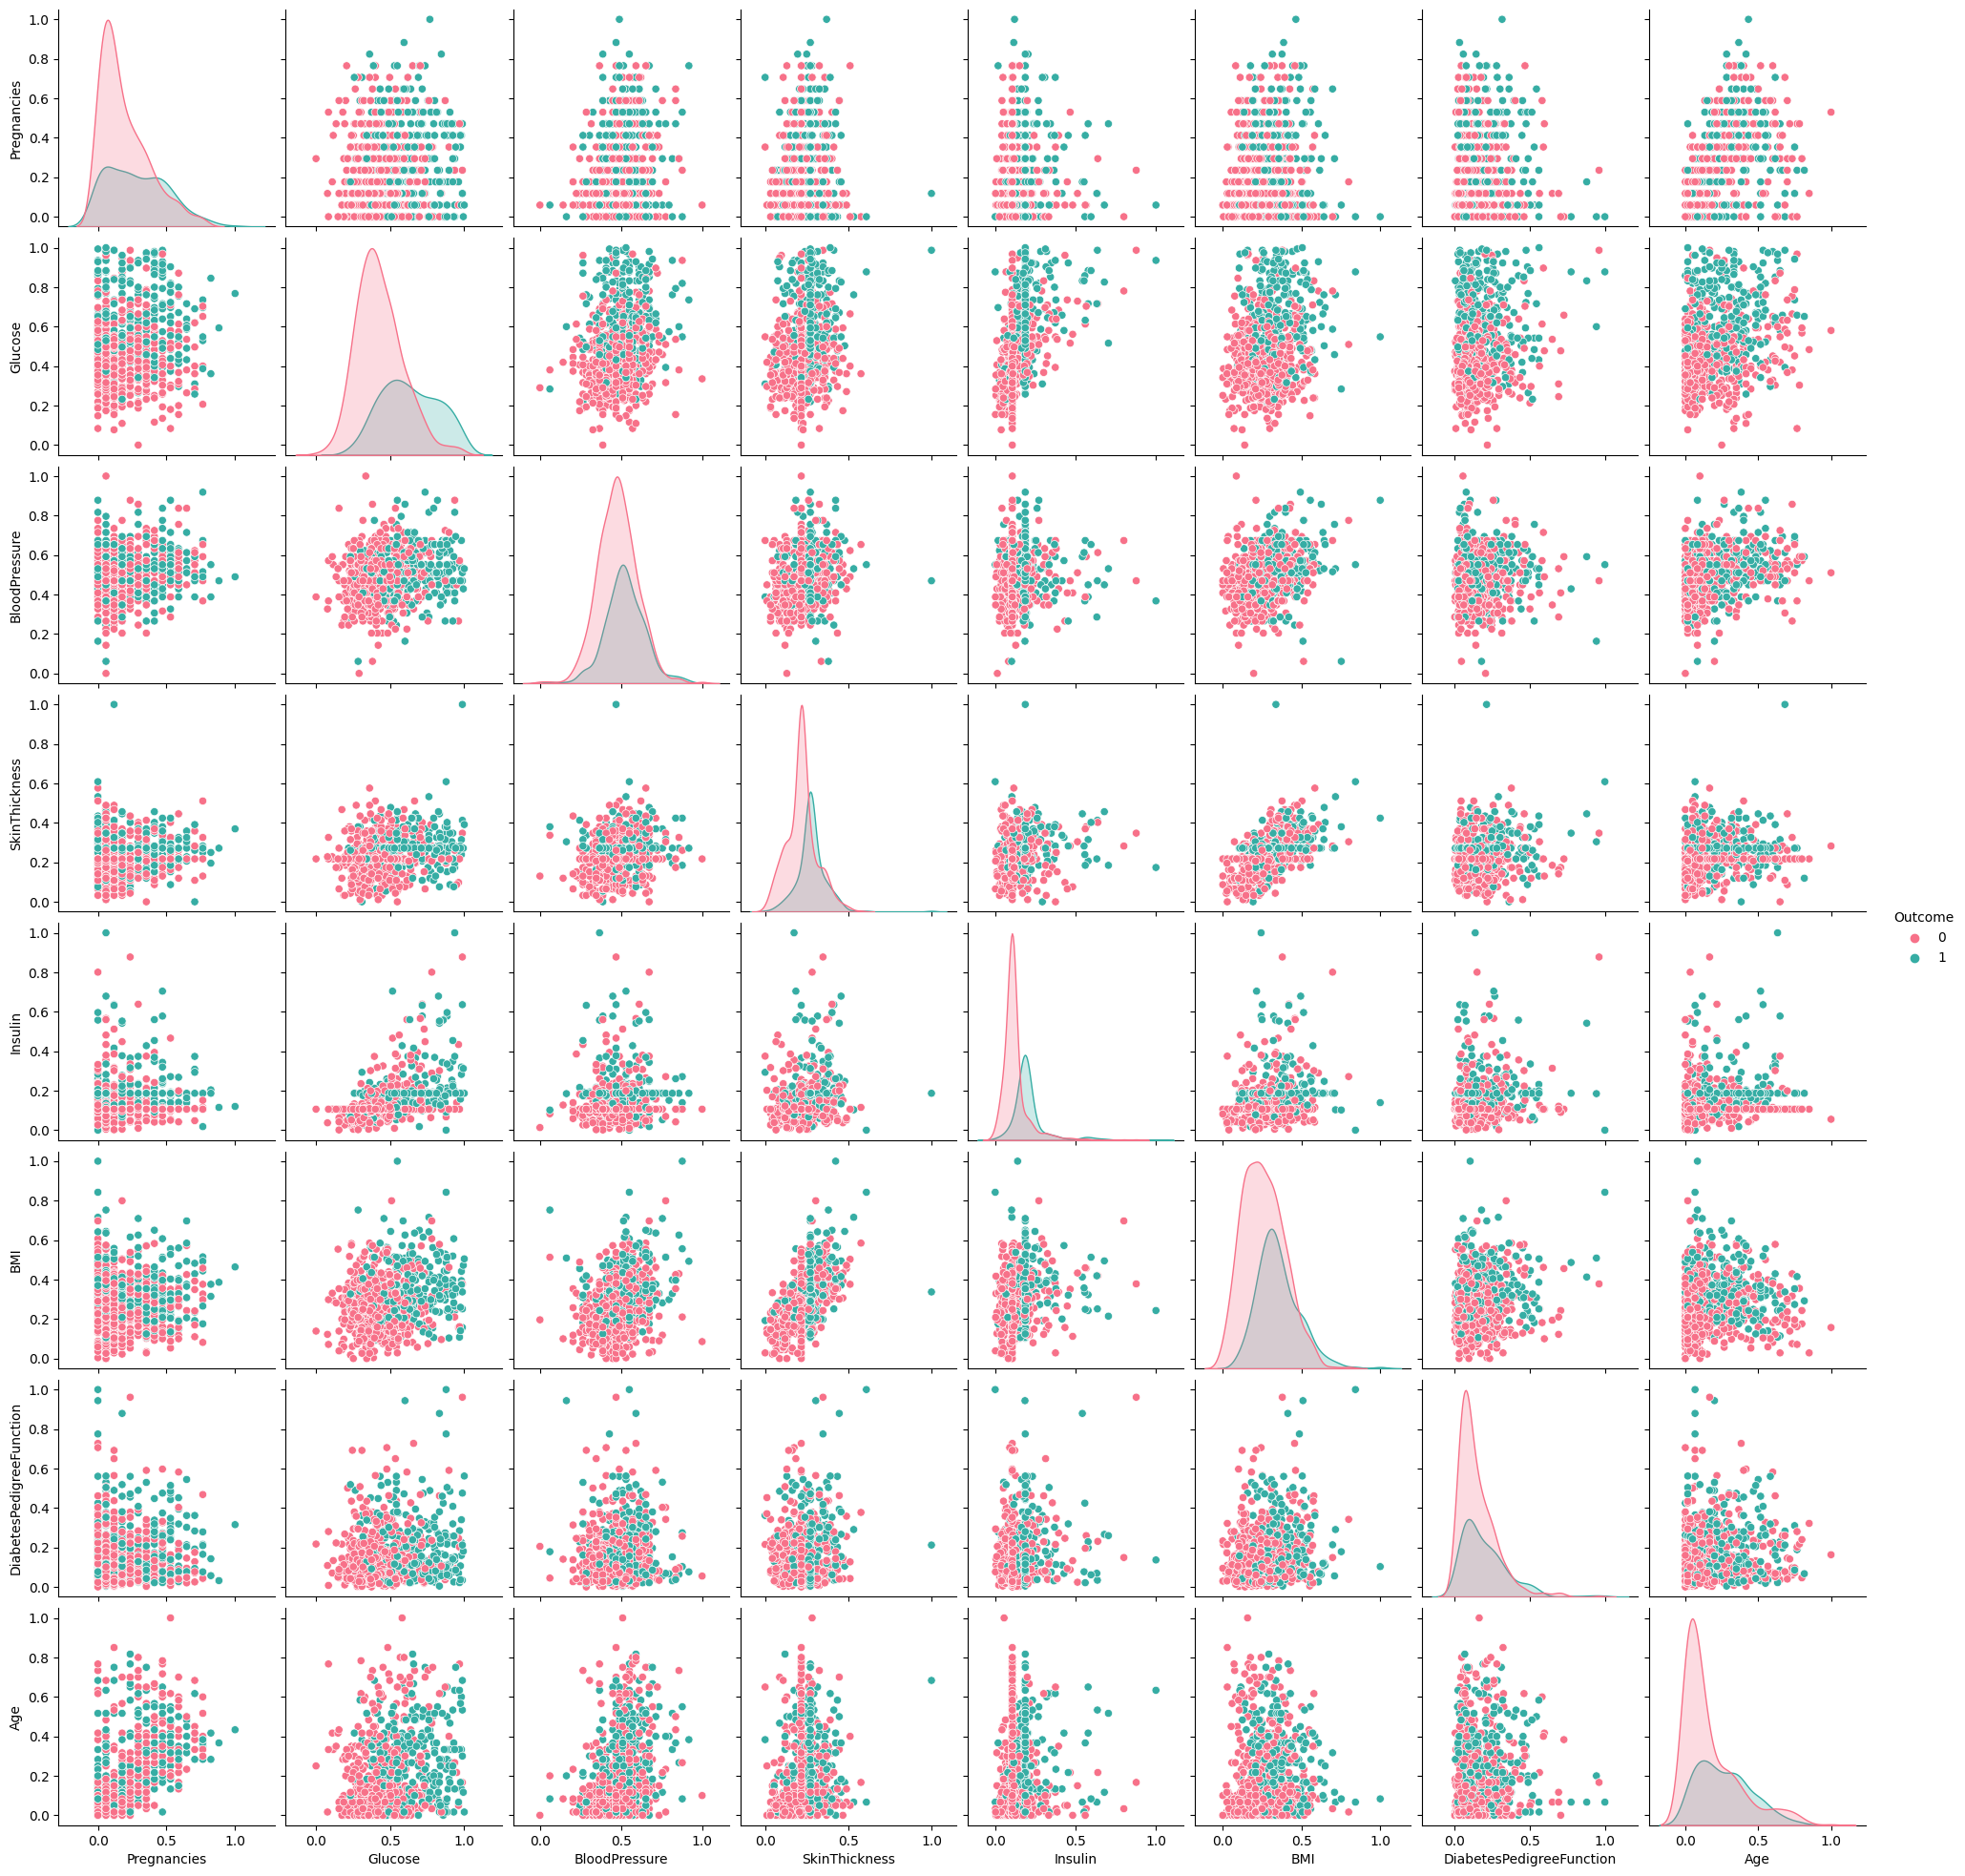

In [42]:
#imprimir en pantalla un pairplot
pp = sns.pairplot(dataset4, hue="Outcome", palette="husl")

**QUIZ PREDICTOR MÁS DISCRIMINANTE**

Observando la diagonal del pairplot, ¿cuál les parece que es el predictor que logra una mejor separación de las clases?
- Pregnancies
- Glucose
- BloodPreassure
- SkinThickness
- Insulin
- BMI
- Age
- DiabetesPedigreeFunction

## Selección de características

Existe una gran cantidad de técnicas de selección de características, principalmente enfocadas en determinar cuáles características o combinaciones de las mismas son las más relevantes para la tarea de predicción. En particular, es deseable eliminar las variables **irrelevantes** y/o **redundantes** para reducirla complejidad del modelo, su tiempo de entrenamiento y en ocasiones inclusive aumentar su desempeño.

Para nuestro ejemplo actual veremos una técnica para eliminar variables redundantes y otra para eliminar las irrelevantes. La **matriz de correlación de Pearson** nos muestra el grado de relación lineal (dependencia) entre cada par de predictores.

![](https://drive.google.com/uc?export=view&id=1btzZcOlyXST4JOedfEyQR24f8Bt-G0_s)

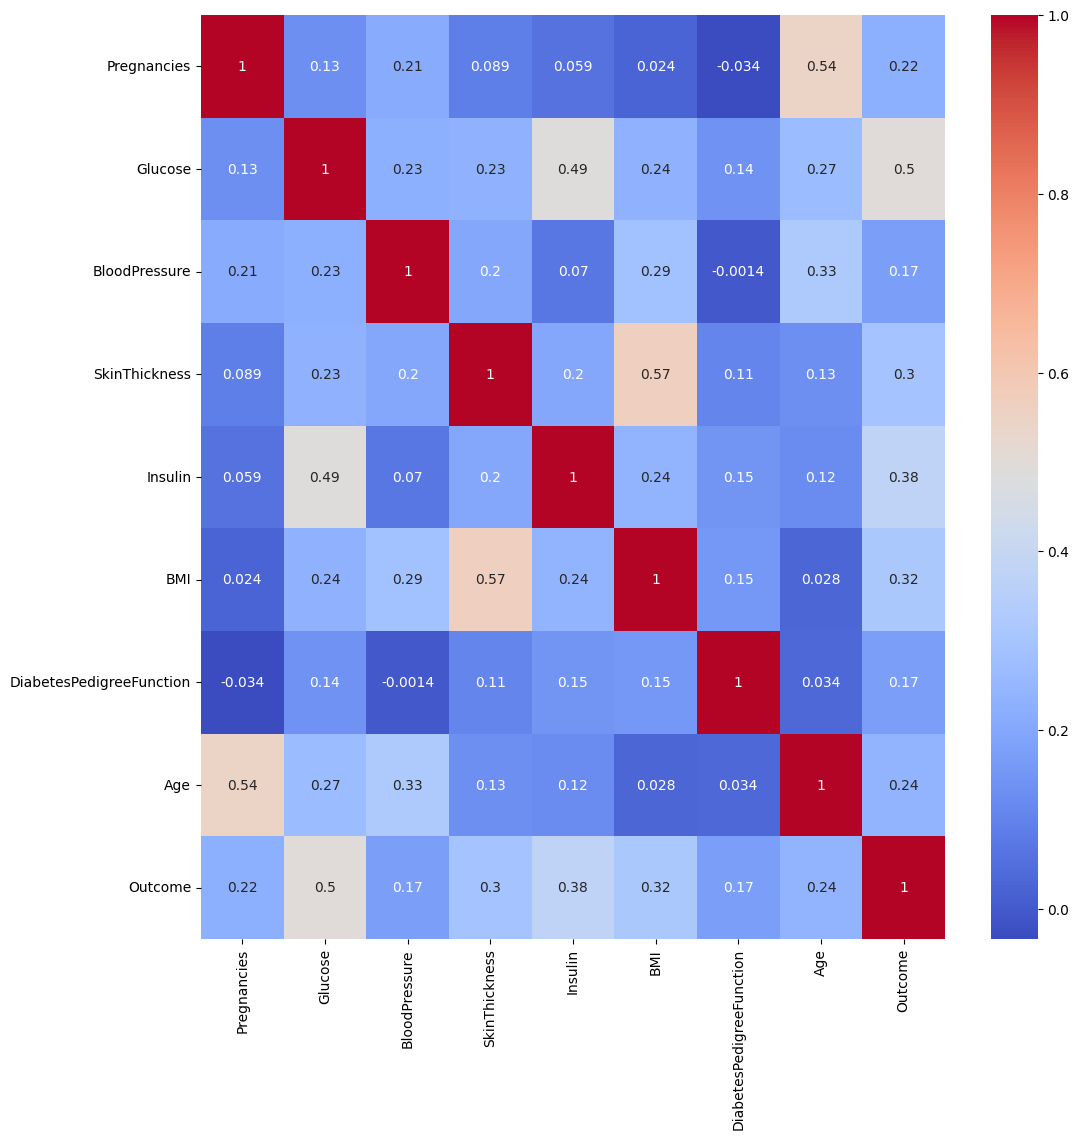

In [43]:
#Impresión de una matriz de correlación
#para cuantificar la dependencia entre las variables
cor=dataset3.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

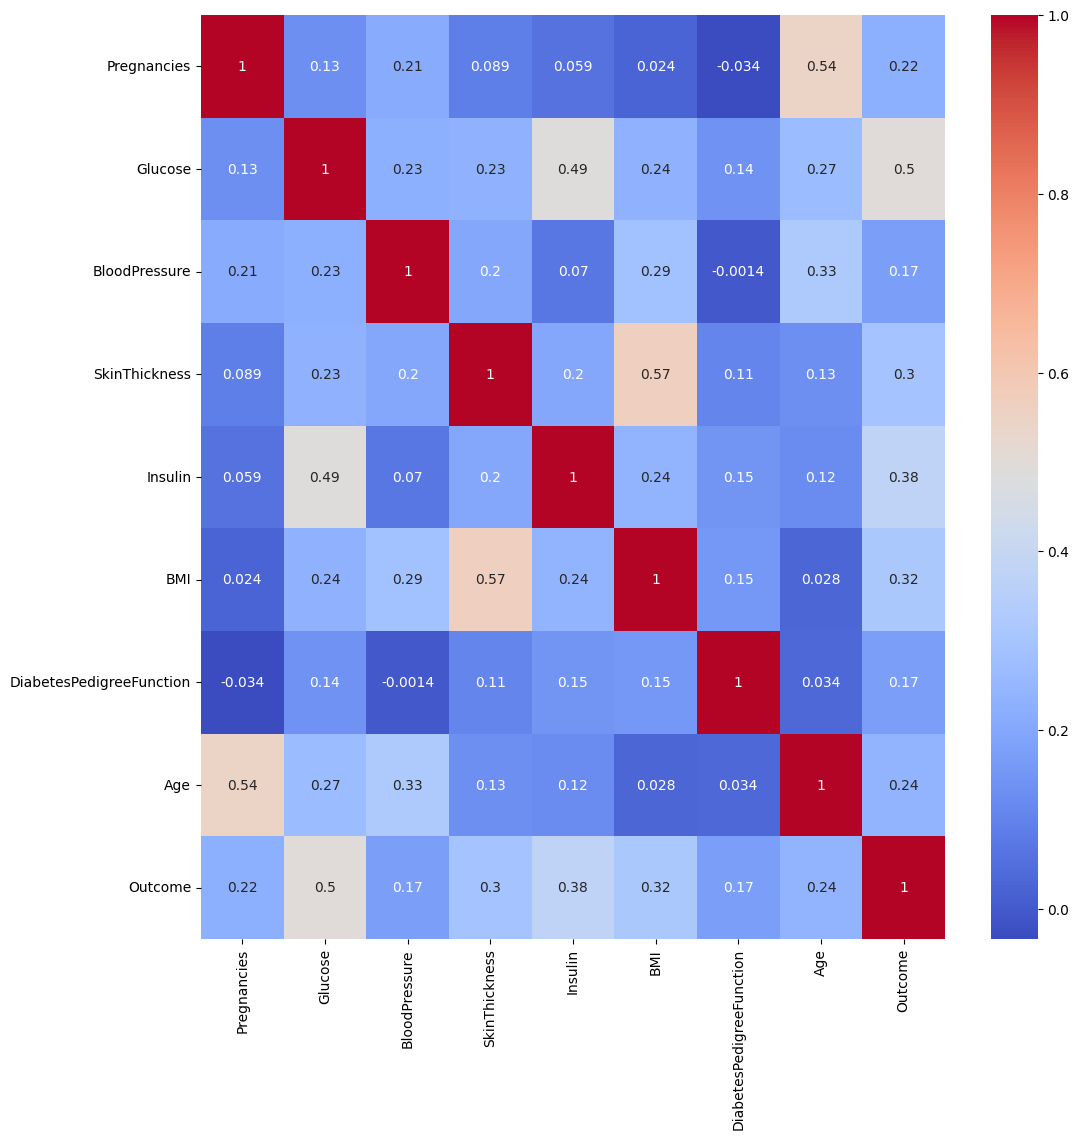

In [44]:
#Impresión de una matriz de correlación
#para cuantificar la dependencia entre las variables
cor=dataset4.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

Dado que los valores de correlación son bastante bajos para todos los predictores, en este caso no eliminamos ninguna variable. Para determinar **los predictores más importantes**, con el fin de predecir el desarrollo o no de diabetes, podemos emplear un clasificador de bosque aleatorio (*Random Forest*)

Es posible obtener la importancia o la relevancia de los atributos a partir de cómo estos se emplean para dividir los nodos que forman los árboles de decisión en un modelo de Random Forest. También conocida como la importancia de Gini.

In [45]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=dataset3[dataset3.columns[:8]]
Y=dataset3['Outcome']
model.fit(X,Y)
featRanking = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
featRanking

Insulin                     0.363715
SkinThickness               0.146408
Glucose                     0.140869
Age                         0.092266
BMI                         0.090501
DiabetesPedigreeFunction    0.070971
Pregnancies                 0.051046
BloodPressure               0.044224
dtype: float64

Podemos selecionar los primeros cinco predictores más relevantes del dataset estandarizado y descartar el resto.

In [46]:
dataset5 = dataset3[featRanking.index[:5]]
dataset5 = pd.concat([dataset5, dataset3[['Outcome']]], axis=1)
dataset5.head()

Insulin  SkinThickness   Glucose       Age       BMI  Outcome
0  0.311604       0.665181  0.864625  1.425995  0.169483        1
1 -0.440843      -0.010112 -1.204727 -0.190672 -0.848549        0
2  0.311604       0.327535  2.014265 -0.105584 -1.328478        1
3 -0.536303      -0.685405 -1.073339 -1.041549 -0.630399        0
4  0.294758       0.665181  0.503310 -0.020496  1.551096        1

También realizamos dicha selección de atributos para el set de datos con la normalización min-max aplicada.

In [47]:
dataset6 = dataset4[featRanking.index[:5]]
dataset6 = pd.concat([dataset6, dataset4[['Outcome']]], axis=1)
dataset6.head()

Insulin  SkinThickness   Glucose       Age       BMI  Outcome
0  0.186899       0.304348  0.670968  0.483333  0.314928        1
1  0.106370       0.239130  0.264516  0.166667  0.171779        0
2  0.186899       0.271739  0.896774  0.183333  0.104294        1
3  0.096154       0.173913  0.290323  0.000000  0.202454        0
4  0.185096       0.304348  0.600000  0.200000  0.509202        1

## Sets de entrenamiento, validación y prueba

![](https://drive.google.com/uc?export=view&id=1bf577we6LDoBnxzZAGCpT8Ft-QNBi8D2)

Para ilustrar el proceso de entrenamiento y validación del modelo, únicamente dividiremos los datos en un set de entrenamiento y validación. En nuestro caso, es importante recordar que había un importante desbalance de clases (500 no diabéticos vs 268 diabéticos), por lo que es recomendable hacer una **estratificación de los datos**, con el fin de mantener las mismas proporciones de las clases tanto en el set de prueba como el de entrenamiento.

In [48]:
#Division en set de prueba y entrenamiento con estratificación
from sklearn.model_selection import train_test_split

train5,val5 = train_test_split(dataset5,test_size=0.25,random_state=0,stratify=dataset5['Outcome'])

#Dividimos set de entrenamiento en predictores y variable de respuesta
train5_X= train5[train5.columns[:3]]
train5_Y= train5['Outcome']

#Dividimos set de validación en predictores y variable de respuesta
val5_X = val5[val5.columns[:3]]
val5_Y= val5['Outcome']

In [49]:
#Entrenamiento del modelo
from sklearn.linear_model import LogisticRegression
logReg5 = LogisticRegression()
logReg5 = logReg5.fit(train5_X, train5_Y)

#Exactitud en el set de entrenamiento
print('Exactitud del modelo de clasificación con el dataset5 en el set de entrenamiento:', logReg5.score(train5_X, train5_Y))

#Exactitud en el set de validación
print('Exactitud del modelo de clasificación con el dataset5 en el set de validación', logReg5.score(val5_X, val5_Y))

Exactitud del modelo de clasificación con el dataset5 en el set de entrenamiento: 0.7708333333333334
Exactitud del modelo de clasificación con el dataset5 en el set de validación 0.78125


## Métricas de evaluación

En algunas ocasiones la exactitud no es la métrica más apropiada para medir el desempeño de un modelo de clasificación. Por ejemplo, en aplicaciones como la detección de transacciones bancarias fraudulentas,  donde se tiene un alto desbalance de clases (digamos 99% de transacciones normales y 1% de transacciones fraudulentas), el modelo al entrenarse puede llegar a predecir todas las observaciones como pertenecientes a la clase dominante y aún así obtener un altísimo valor de exactitud (99%).

 Para detectar este tipo de falencias del modelo podemos calcular la **presición**, la **exhaustividad** o el **puntaje $F_1$**. Si el interés está enfocado en reducir los FP, la presición:

$\mathit{pre}=\frac{\mathit{VP}}{\mathit{VP} + \mathit{FP}}$

nos dice el porcentaje de predicciones positivas que fueron correctas. Si por el contrario el interés está enfocado en reducir los FN, la exhaustividad:

$\mathit{exha}=\frac{\mathit{VP}}{\mathit{VP} + \mathit{FN}}$

nos indica del total de observaciones pertenecientes a la clase positiva cuantas fueron correctamente detectadas como pertenecientes a la clase positiva. Por último, si en nuestro problema los FP y FN tienen la misma importancia y se desea reducir ambos equitativamente, el puntaje $F_1$ resulta sumamente útil:

$F_1=2 \frac{\mathit{pre} \cdot \mathit{exha}}{\mathit{pre} + \mathit{exha}}$

In [50]:
from sklearn.metrics import f1_score, recall_score, precision_score

#Exactitud en el set de entrenamiento
predict_train5 = logReg5.predict(train5_X)
print('Resultados para el set de entrenamiento:')
print('Precisión:',precision_score(train5_Y,predict_train5),'Exhaustividad:',recall_score(train5_Y,predict_train5))
print('F1_score:',f1_score(train5_Y,predict_train5), 'Exactitud:',logReg5.score(train5_X, train5_Y),'\n')

#Exactitud en el set de validación
predict_val5 = logReg5.predict(val5_X)
print('Resultados para el set de validación:')
print('Precisión:',precision_score(val5_Y,predict_val5),'Exhaustividad:',recall_score(val5_Y,predict_val5))
print('F1_score:',f1_score(val5_Y,predict_val5), 'Exactitud:',logReg5.score(val5_X, val5_Y))


Resultados para el set de entrenamiento:
Precisión: 0.7169811320754716 Exhaustividad: 0.5671641791044776
F1_score: 0.6333333333333333 Exactitud: 0.7708333333333334 

Resultados para el set de validación:
Precisión: 0.7192982456140351 Exhaustividad: 0.6119402985074627
F1_score: 0.6612903225806452 Exactitud: 0.78125


Para nuestro problema, vamos a suponer que tanto los falsos negativos (personas diabéticas clasificadas como no diabéticas) como los falsos positivos (personas no diabéticas clasificadas como diabéticas) son igual de importantes y por lo tanto usaremos el puntaje $F_1$ como la métrica oficial.

## Refinamiento del modelo

Podemos ver cuanto aumentó o disminuyó el desempeño del modelo de regresión logística simple para cada transformación que hicimos al set de datos.

In [51]:
#Ver qué transformaciones de los datos permiten al modelo tener el mejor desempeño sobre el set de validación.
#dataset: set de datos original
#dataset2: set de datos sin valores faltantes
#dataset3: set de datos con estandarización
#dataset4: set de datos con normalización min-max
#dataset5: set de datos estandarizado con los 5 atributos más relevantes
#dataset6: set de datos normalizado con los 5 atributos más relevantes

list_of_datasets = [dataset,dataset2,dataset3,dataset4,dataset5,dataset6]
models = []
results = pd.DataFrame(columns=['Datasets', 'F1_train', 'F1_val'])

for i,d in enumerate(list_of_datasets):

  train,val = train_test_split(d,test_size=0.25,random_state=0,stratify=d['Outcome'])

  #Dividimos set de entrenamiento en predictores y variable de respuesta
  train_X= train[train.columns[:-1]]
  train_Y= train['Outcome']

  #Dividimos set de validación en predictores y variable de respuesta
  val_X = val[val.columns[:-1]]
  val_Y= val['Outcome']

  #Entrenamiento del modelo
  m = LogisticRegression(max_iter=400)
  m = m.fit(train_X, train_Y)
  models.append(m)

  #Predicciones
  predict_train = m.predict(train_X)
  predict_val = m.predict(val_X)

  #Desempeño
  res_data = pd.DataFrame.from_dict({'Datasets':[int(i+1)],
                                     'F1_train':[f1_score(train_Y,predict_train)],
                                     'F1_val':[f1_score(val_Y,predict_val)]
                                     })
  results = pd.concat([results, res_data], ignore_index=True)

results

Datasets  F1_train    F1_val
0        1  0.638655  0.650000
1        2  0.688172  0.606557
2        3  0.682927  0.606557
3        4  0.659218  0.622951
4        5  0.653740  0.661417
5        6  0.640000  0.639344

**QUIZ MEJORA DEL DESEMPEÑO**

El error que observamos en el modelo corresponde principalmente a:

- Error de sesgo (subajuste)
- Error de varianza (sobreajuste)
- Ambos por igual
- Ninguna de las anteriores

## Conclusiones sobre el aprendizaje automático

- Existe una enorme variedad en cuanto a tipos de datos, problemas, técnicas de preprocesamiento, modelos de aprendizaje automático y formas de medir su desempeño. No existe un único camino "correcto" para aplicar el aprendizaje automático y puede variar significativamente entre cada caso.
- El proceso de entrenamiento y refinamiento de los parámetros de uno o varios modelos de aprendizaje automático suele ser iterativo y es importante un diseño apropiado de los experimentos.
- Es vital seleccionar las métricas adecuadas según el problema que se quiera resolver.
- Para combatir el problema del sobreajuste, existen diversas técnicas de **regularización** aplicables a muchos modelos de aprendizaje automático. También puede resultar útil aumentar el tamaño del set de entrenamiento o probar otros modelos.
- Existen otras técnicas de entrenamiento y validación de los modelos estadísticamente más robustas como la **validación cruzada**.  
- También existen muchas técnicas para lidiar con el desbalance de clases basadas en la creación de datos artificiales, usar pesos predeterminados en el modelo para darle más importancia a las clases menos representadas, entre otras.

![](https://drive.google.com/uc?export=view&id=1u9AiqosDYbp9jlKxgtgmwuhHezbcDetN)



## Práctica 6

Aumentar la complejidad del modelo y cantidad de iteraciones para ver hasta que punto se puede mejorar el puntaje $F_1$, especialmente en el set de validación. Reportar cuál de los seis datasets es el que permite el mejor desempeño. Luego, responda:

1. De acuerdo con los resultados base, obtenidos con la regresión logística no polinomial, el puntaje $F_1$ disminuye en el set de validación al rellenar valores inválidos y estandarizar los datos, ¿esto mismo se cumple al aumentar la complejidad del modelo?

2. Si quisiéramos optimizar el modelo para reducir al máximo la cantidad de falsos negativos (personas con diabetes clasificadas como no diabéticas), ¿cuál sería la métrica más conveniente? Realice las modificaciones a nivel de código para mostrar el resultado de esta métrica.

In [85]:
# 1) Aumento de complegidad del modelo
from sklearn.preprocessing import PolynomialFeatures

#Ver qué transformaciones de los datos permiten al modelo tener el mejor desempeño sobre el set de validación.
#dataset: set de datos original
#dataset2: set de datos sin valores faltantes
#dataset3: set de datos con estandarización
#dataset4: set de datos con normalización min-max
#dataset5: set de datos estandarizado con los 5 atributos más relevantes
#dataset6: set de datos normalizado con los 5 atributos más relevantes

list_of_datasets = [dataset,dataset2,dataset3,dataset4,dataset5,dataset6]
models = []
results = pd.DataFrame(columns=['Datasets', 'F1_train', 'F1_val'])

degree = 2 # Polynomial degree

for i,d in enumerate(list_of_datasets):

  train,val = train_test_split(d,test_size=0.25,random_state=0,stratify=d['Outcome'])

  #Dividimos set de entrenamiento en predictores y variable de respuesta
  train_X= train[train.columns[:-1]]
  train_Y= train['Outcome']

  #Dividimos set de validación en predictores y variable de respuesta
  val_X = val[val.columns[:-1]]
  val_Y= val['Outcome']

  # Para reg polinomial
  #d_pol = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(d.iloc[:,:-1])
  train_X_pol = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(train_X)
  val_X_pol   = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(val_X)

  #Entrenamiento del modelo
  m = LogisticRegression(max_iter=400)
  m = m.fit(train_X_pol, train_Y)
  models.append(m)

  #Predicciones
  predict_train = m.predict(train_X_pol)
  predict_val = m.predict(val_X_pol)

  #Desempeño
  res_data = pd.DataFrame.from_dict({'Datasets':[int(i+1)],
                                     'F1_train':[f1_score(train_Y,predict_train)],
                                     'F1_val':[f1_score(val_Y,predict_val)]
                                     })
  results = pd.concat([results, res_data], ignore_index=True)

results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Datasets  F1_train    F1_val
0        1  0.592179  0.606557
1        2  0.781250  0.692308
2        3  0.824427  0.718750
3        4  0.664804  0.633333
4        5  0.814433  0.704000
5        6  0.651558  0.655738

1) utilizando una Regresión Logística Polinomial de segundo grado para aumentar la complejidad del modelo se obtiene una exactitud de 0.69 para el set de datos sin valores faltantes y una exactitud de 0.72 para el set de datos normalizado con estandarización mostrando un comportamiento diferente al observado en la regresión logística simple.

2) Si el interés es reducir la cantidad de falsos negativos obtenidos por el modelo, la métrica de exhaustividad puede resultar más conveniente para medir el desempeño.

In [87]:
# 2) Métrica -> exhaustividad
from sklearn.preprocessing import PolynomialFeatures

#Ver qué transformaciones de los datos permiten al modelo tener el mejor desempeño sobre el set de validación.
#dataset: set de datos original
#dataset2: set de datos sin valores faltantes
#dataset3: set de datos con estandarización
#dataset4: set de datos con normalización min-max
#dataset5: set de datos estandarizado con los 5 atributos más relevantes
#dataset6: set de datos normalizado con los 5 atributos más relevantes

list_of_datasets = [dataset,dataset2,dataset3,dataset4,dataset5,dataset6]
models = []
results = pd.DataFrame(columns=['Datasets', 'Recall_train', 'Recall_val'])

degree = 2 # Polynomial degree

for i,d in enumerate(list_of_datasets):

  train,val = train_test_split(d,test_size=0.25,random_state=0,stratify=d['Outcome'])

  #Dividimos set de entrenamiento en predictores y variable de respuesta
  train_X= train[train.columns[:-1]]
  train_Y= train['Outcome']

  #Dividimos set de validación en predictores y variable de respuesta
  val_X = val[val.columns[:-1]]
  val_Y= val['Outcome']

  # Para reg polinomial
  #d_pol = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(d.iloc[:,:-1])
  train_X_pol = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(train_X)
  val_X_pol   = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(val_X)

  #Entrenamiento del modelo
  m = LogisticRegression(max_iter=400)
  m = m.fit(train_X_pol, train_Y)
  models.append(m)

  #Predicciones
  predict_train = m.predict(train_X_pol)
  predict_val = m.predict(val_X_pol)

  #Desempeño
  res_data = pd.DataFrame.from_dict({'Datasets':[int(i+1)],
                                     'Recall_train':[recall_score(train_Y,predict_train)],
                                     'Recall_val':[recall_score(val_Y,predict_val)]
                                     })
  results = pd.concat([results, res_data], ignore_index=True)

results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Datasets  Recall_train  Recall_val
0        1      0.527363    0.552239
1        2      0.746269    0.671642
2        3      0.805970    0.686567
3        4      0.592040    0.567164
4        5      0.786070    0.656716
5        6      0.572139    0.597015